In [110]:
import scipy.io
import torch
import os
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
import numpy as np

In [111]:
# data_dir = "/media/mountHDD3/data_storage/biomedical_data/ecg_data/khoibaocon/alldata"
# print(os.listdir(data_dir))
save_dir = os.getcwd()
mat = scipy.io.loadmat("/media/mountHDD3/data_storage/biomedical_data/ecg_data/khoibaocon/alldata/A0011.mat")

In [112]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'ECG'])

In [113]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Dec 19 17:00:59 2017',
 '__version__': '1.0',
 '__globals__': [],
 'ECG': array([[(array(['Male'], dtype='<U4'), array([[87]], dtype=uint8), array([[ 1.83733889e-02,  3.53733889e-02,  4.73733889e-02, ...,
                 -1.76266111e-02, -1.36266111e-02, -1.06266111e-02],
                [-7.67626667e-02, -6.07626667e-02, -5.17626667e-02, ...,
                 -2.27626667e-02, -1.77626667e-02, -1.47626667e-02],
                [-9.51360556e-02, -9.61360556e-02, -9.91360556e-02, ...,
                 -5.13605556e-03, -4.13605556e-03, -4.13605556e-03],
                ...,
                [ 6.47714444e-02,  4.67714444e-02,  2.97714444e-02, ...,
                  7.71444444e-04,  1.77144444e-03,  1.77144444e-03],
                [-3.53959222e-01, -3.51959222e-01, -3.51959222e-01, ...,
                 -9.59222222e-04,  4.07777778e-05, -9.59222222e-04],
                [-7.76268056e-01, -7.64268056e-01, -7.54268056e-

In [114]:
save_dir

'/media/mountHDD2/thao/git/HeartResearch/Data Exploration'

In [115]:
x = mat.get("ECG")

In [116]:
type(x)

numpy.ndarray

In [117]:
x

array([[(array(['Male'], dtype='<U4'), array([[87]], dtype=uint8), array([[ 1.83733889e-02,  3.53733889e-02,  4.73733889e-02, ...,
                -1.76266111e-02, -1.36266111e-02, -1.06266111e-02],
               [-7.67626667e-02, -6.07626667e-02, -5.17626667e-02, ...,
                -2.27626667e-02, -1.77626667e-02, -1.47626667e-02],
               [-9.51360556e-02, -9.61360556e-02, -9.91360556e-02, ...,
                -5.13605556e-03, -4.13605556e-03, -4.13605556e-03],
               ...,
               [ 6.47714444e-02,  4.67714444e-02,  2.97714444e-02, ...,
                 7.71444444e-04,  1.77144444e-03,  1.77144444e-03],
               [-3.53959222e-01, -3.51959222e-01, -3.51959222e-01, ...,
                -9.59222222e-04,  4.07777778e-05, -9.59222222e-04],
               [-7.76268056e-01, -7.64268056e-01, -7.54268056e-01, ...,
                -1.72680556e-02, -1.72680556e-02, -1.62680556e-02]]))                                                             ]],
      dtype=[('

In [118]:
x.shape

(1, 1)

In [119]:
a = x[0][0]

In [120]:
type(a)

numpy.void

In [121]:
a[0]

array(['Male'], dtype='<U4')

In [122]:
a

(array(['Male'], dtype='<U4'), array([[87]], dtype=uint8), array([[ 1.83733889e-02,  3.53733889e-02,  4.73733889e-02, ...,
        -1.76266111e-02, -1.36266111e-02, -1.06266111e-02],
       [-7.67626667e-02, -6.07626667e-02, -5.17626667e-02, ...,
        -2.27626667e-02, -1.77626667e-02, -1.47626667e-02],
       [-9.51360556e-02, -9.61360556e-02, -9.91360556e-02, ...,
        -5.13605556e-03, -4.13605556e-03, -4.13605556e-03],
       ...,
       [ 6.47714444e-02,  4.67714444e-02,  2.97714444e-02, ...,
         7.71444444e-04,  1.77144444e-03,  1.77144444e-03],
       [-3.53959222e-01, -3.51959222e-01, -3.51959222e-01, ...,
        -9.59222222e-04,  4.07777778e-05, -9.59222222e-04],
       [-7.76268056e-01, -7.64268056e-01, -7.54268056e-01, ...,
        -1.72680556e-02, -1.72680556e-02, -1.62680556e-02]]))

In [123]:
a[2].shape


(12, 18000)

In [124]:
print(len(a[2][1]))

18000


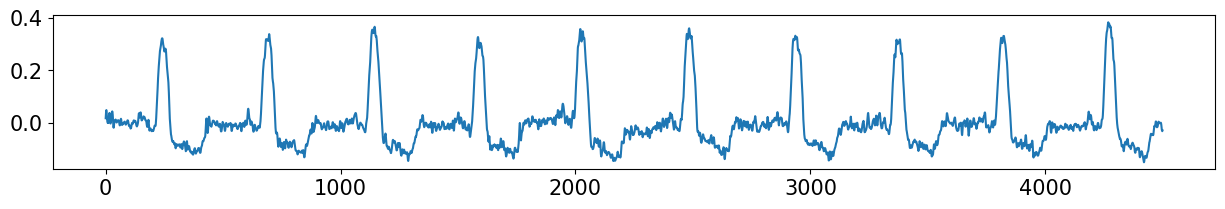

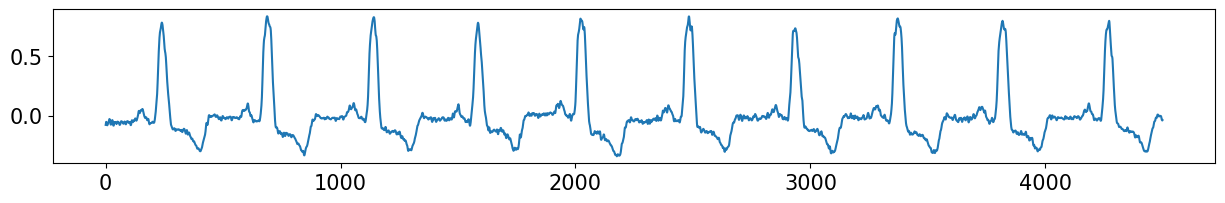

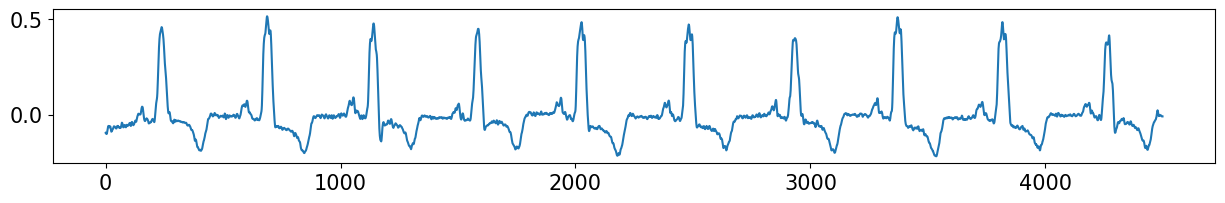

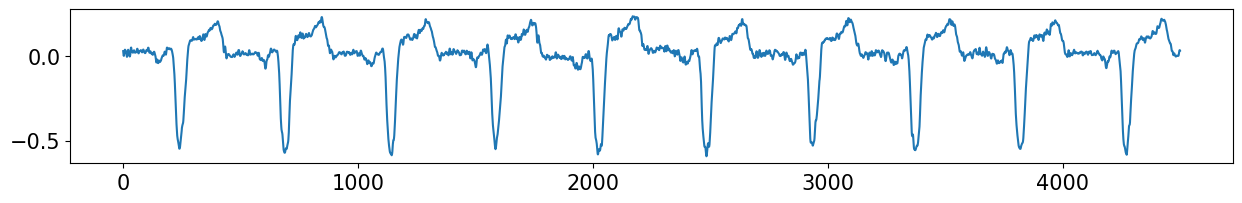

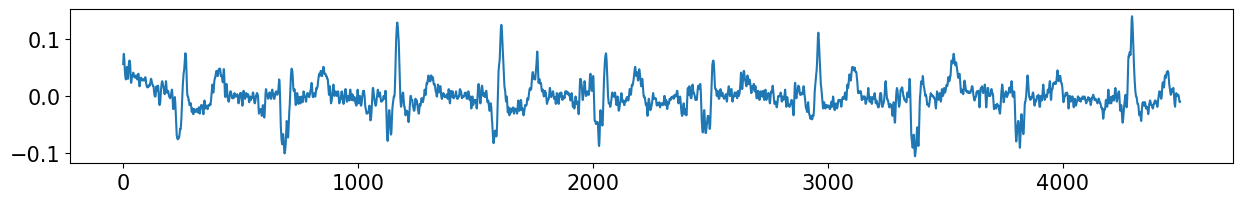

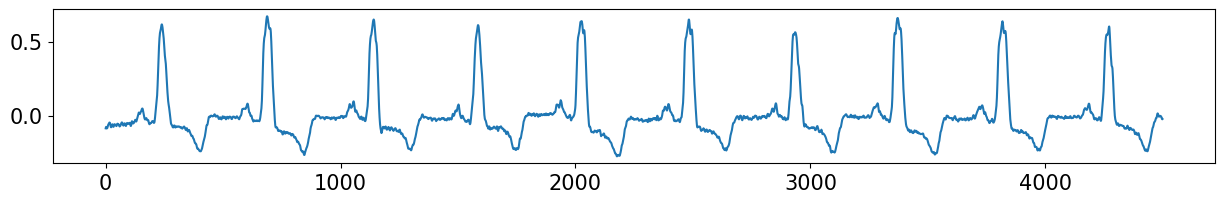

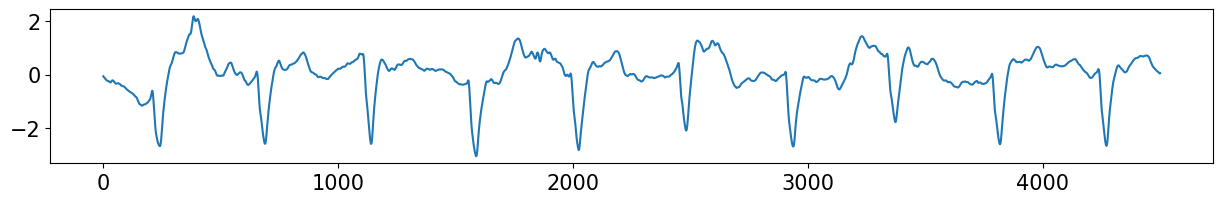

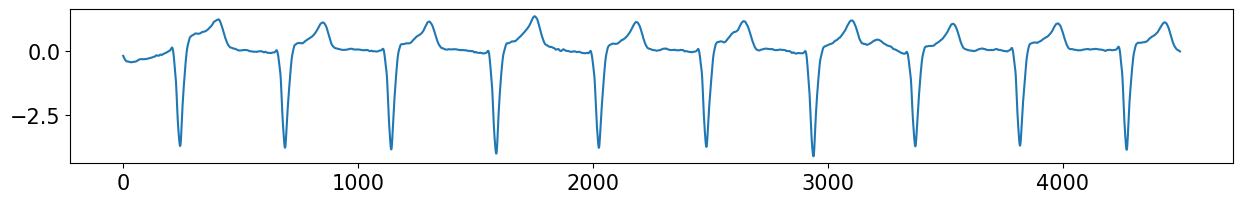

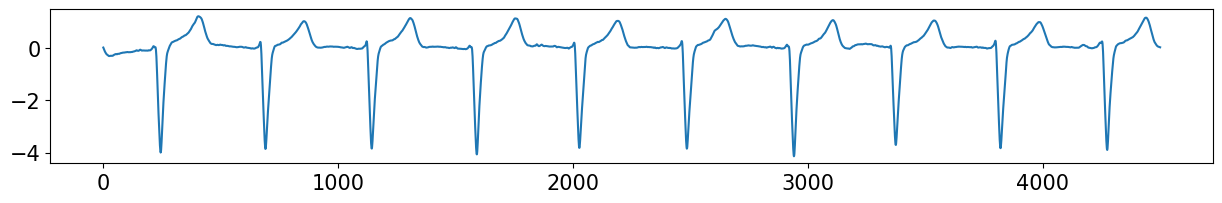

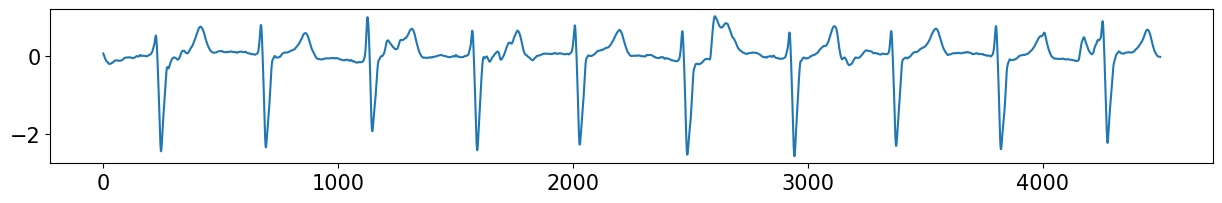

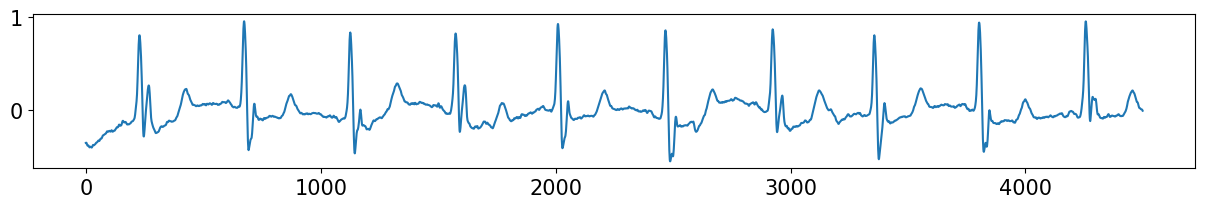

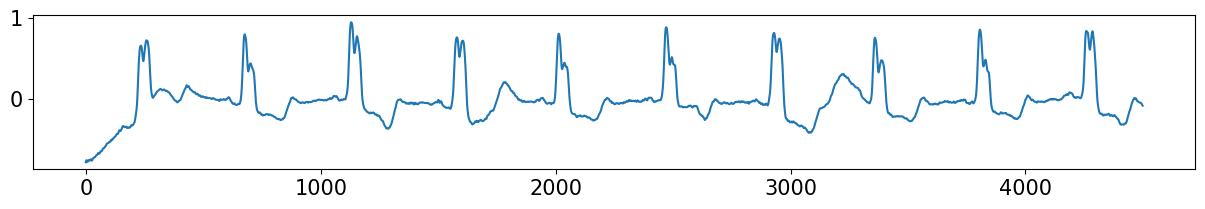

In [125]:
def plots(i):
    plt.figure(figsize = (15,2))
    plt.plot(a[2][i][:4500])

for i in range(12):
    if i % 1 ==0:
        plots(i)
# save_dir =         
# plt.savefig()


In [126]:
## Grayscale
data = scipy.io.loadmat("/media/mountHDD2/khoibaocon/alldata/A0011.mat")['ECG'][0][0][2]
clip_data = data[:, 500:2500]
clip_data = torch.tensor(clip_data, dtype=torch.float32)
normalized_data = (clip_data - clip_data.min()) / (clip_data.max() - clip_data.min())
grayscale_images = (normalized_data * 255)
grayscale_images = grayscale_images.unsqueeze(0).unsqueeze(0) # (1, 1, h, w)
resized_images = F.interpolate(grayscale_images, size=(12*4,2500), mode='bilinear', align_corners=True)
resized_images = resized_images.squeeze(0).squeeze(0)
print(resized_images.shape)
torch_data = resized_images.unsqueeze(0).repeat(3, 1, 1)
plt.figure(figsize=(25, 25))
plt.imshow(resized_images, cmap='gray', vmin=0, vmax=255)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/media/mountHDD2/khoibaocon/alldata/A0011.mat'

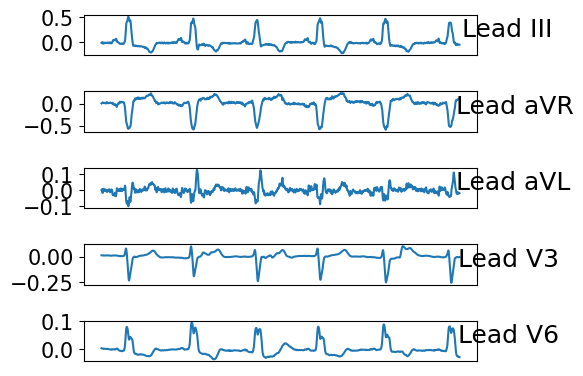

In [127]:
fig, axs = plt.subplots(5, 1)
axs[0].plot(a[2][2][500:3000], 'tab:blue')
axs[0].set_title('Lead III',x=1.075,y = 0.25)
axs[1].plot(a[2][3][500:3000], 'tab:blue')
axs[1].set_title('Lead aVR',x=1.095,y = 0.25)
axs[2].plot(a[2][4][500:3000], 'tab:blue')
axs[2].set_title('Lead aVL',x=1.09,y = 0.25)
axs[3].plot(a[2][9][500:3000]/10, 'tab:blue')
axs[3].set_title('Lead V3',x=1.08,y = 0.25)
axs[4].plot(a[2][11][500:3000]/10, 'tab:blue')
axs[4].set_title('Lead V6',x=1.08,y = 0.25)
axs[0].axes.get_xaxis().set_ticks([])
axs[1].axes.get_xaxis().set_ticks([])
axs[2].axes.get_xaxis().set_ticks([])
axs[3].axes.get_xaxis().set_ticks([])
axs[4].axes.get_xaxis().set_ticks([])
plt.tight_layout(pad = 3, h_pad = 1, w_pad = 1)
bbox_inches='tight'
# plt.savefig("/home/thaobeo/git/HeartResearch/ECGsig.pdf", format = 'pdf', dpi = 300)

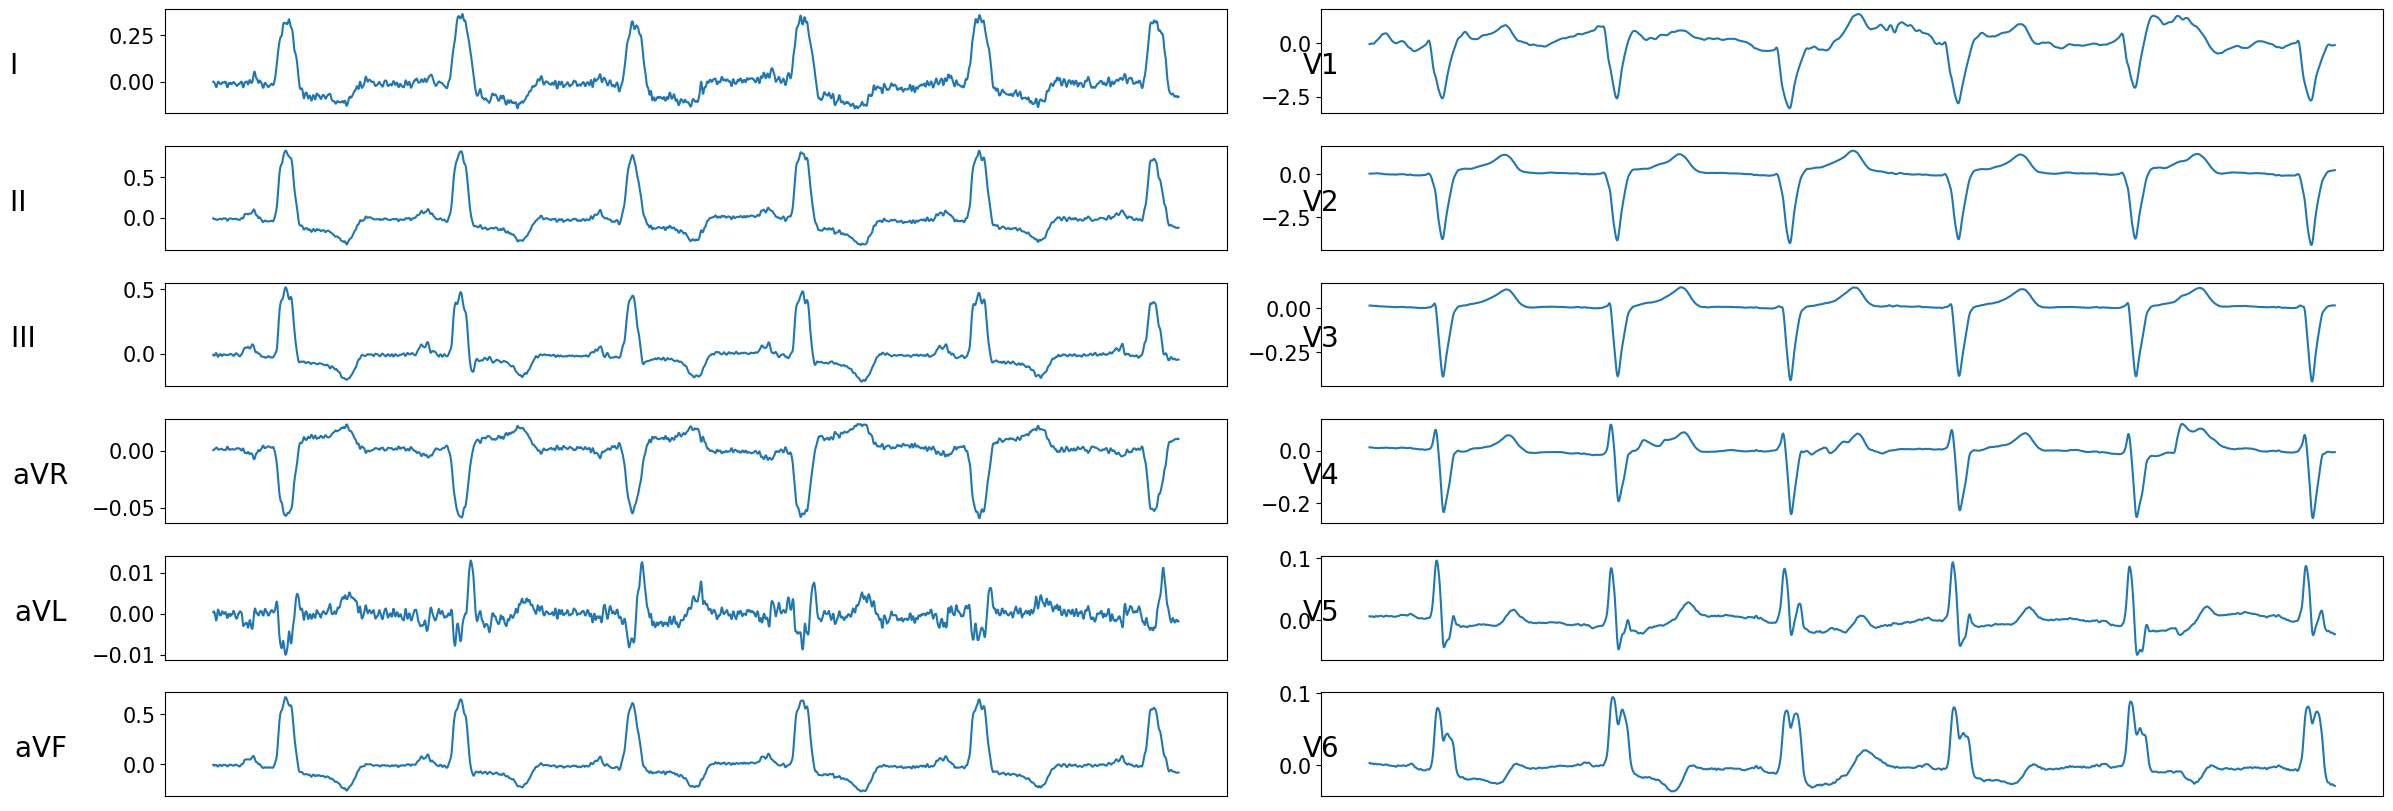

In [128]:
import matplotlib.pyplot as plt
# plt.rcParams.update({'font.size': 15})

fig, axs = plt.subplots(6, 2, figsize=(25, 10))
axs[0][0].plot(a[2][0][500:3000], 'tab:blue')
axs[0][0].set_title('I                                  ', fontsize = 20, x=0,y = 0.3)
axs[1][0].plot(a[2][1][500:3000], 'tab:blue')
axs[1][0].set_title('II                                 ', fontsize = 20, x=0,y = 0.3)
axs[2][0].plot(a[2][2][500:3000], 'tab:blue')
axs[2][0].set_title('III                                ', fontsize = 20, x=0,y = 0.3)
axs[3][0].plot(a[2][3][500:3000]/10, 'tab:blue')
axs[3][0].set_title('aVR                            ', fontsize = 20, x=0,y = 0.3)
axs[4][0].plot(a[2][4][500:3000]/10, 'tab:blue')
axs[4][0].set_title('aVL                            ', fontsize = 20, x=0,y = 0.3)
axs[5][0].plot(a[2][5][500:3000], 'tab:blue')
axs[5][0].set_title('aVF                            ', fontsize = 20, x=0,y = 0.3)
axs[0][1].plot(a[2][6][500:3000], 'tab:blue')
axs[0][1].set_title('V1', fontsize = 20, x=0,y = 0.3)
axs[1][1].plot(a[2][7][500:3000], 'tab:blue')
axs[1][1].set_title('V2', fontsize = 20, x=0,y = 0.3)
axs[2][1].plot(a[2][8][500:3000]/10, 'tab:blue')
axs[2][1].set_title('V3', fontsize = 20, x=0,y = 0.3)
axs[3][1].plot(a[2][9][500:3000]/10, 'tab:blue')
axs[3][1].set_title('V4', fontsize = 20, x=0,y = 0.3)
axs[4][1].plot(a[2][10][500:3000]/10, 'tab:blue')
axs[4][1].set_title('V5', fontsize = 20, x=0,y = 0.3)
axs[5][1].plot(a[2][11][500:3000]/10, 'tab:blue')
axs[5][1].set_title('V6', fontsize = 20, x=0,y = 0.3)
axs[0][0].axes.get_xaxis().set_ticks([])
axs[1][0].axes.get_xaxis().set_ticks([])
axs[2][0].axes.get_xaxis().set_ticks([])
axs[3][0].axes.get_xaxis().set_ticks([])
axs[4][0].axes.get_xaxis().set_ticks([])
axs[5][0].axes.get_xaxis().set_ticks([])
axs[0][1].axes.get_xaxis().set_ticks([])
axs[1][1].axes.get_xaxis().set_ticks([])
axs[2][1].axes.get_xaxis().set_ticks([])
axs[3][1].axes.get_xaxis().set_ticks([])
axs[4][1].axes.get_xaxis().set_ticks([])
axs[5][1].axes.get_xaxis().set_ticks([])
# plt.xticks(np.arange(-5, 5, step=2))
plt.tight_layout(pad = 5, h_pad = 1, w_pad = 1)
bbox_inches='tight'
plt.savefig("/media/mountHDD2/thao/git/HeartResearch/Data Exploration/ECGsig.pdf", format = 'pdf', dpi = 300)

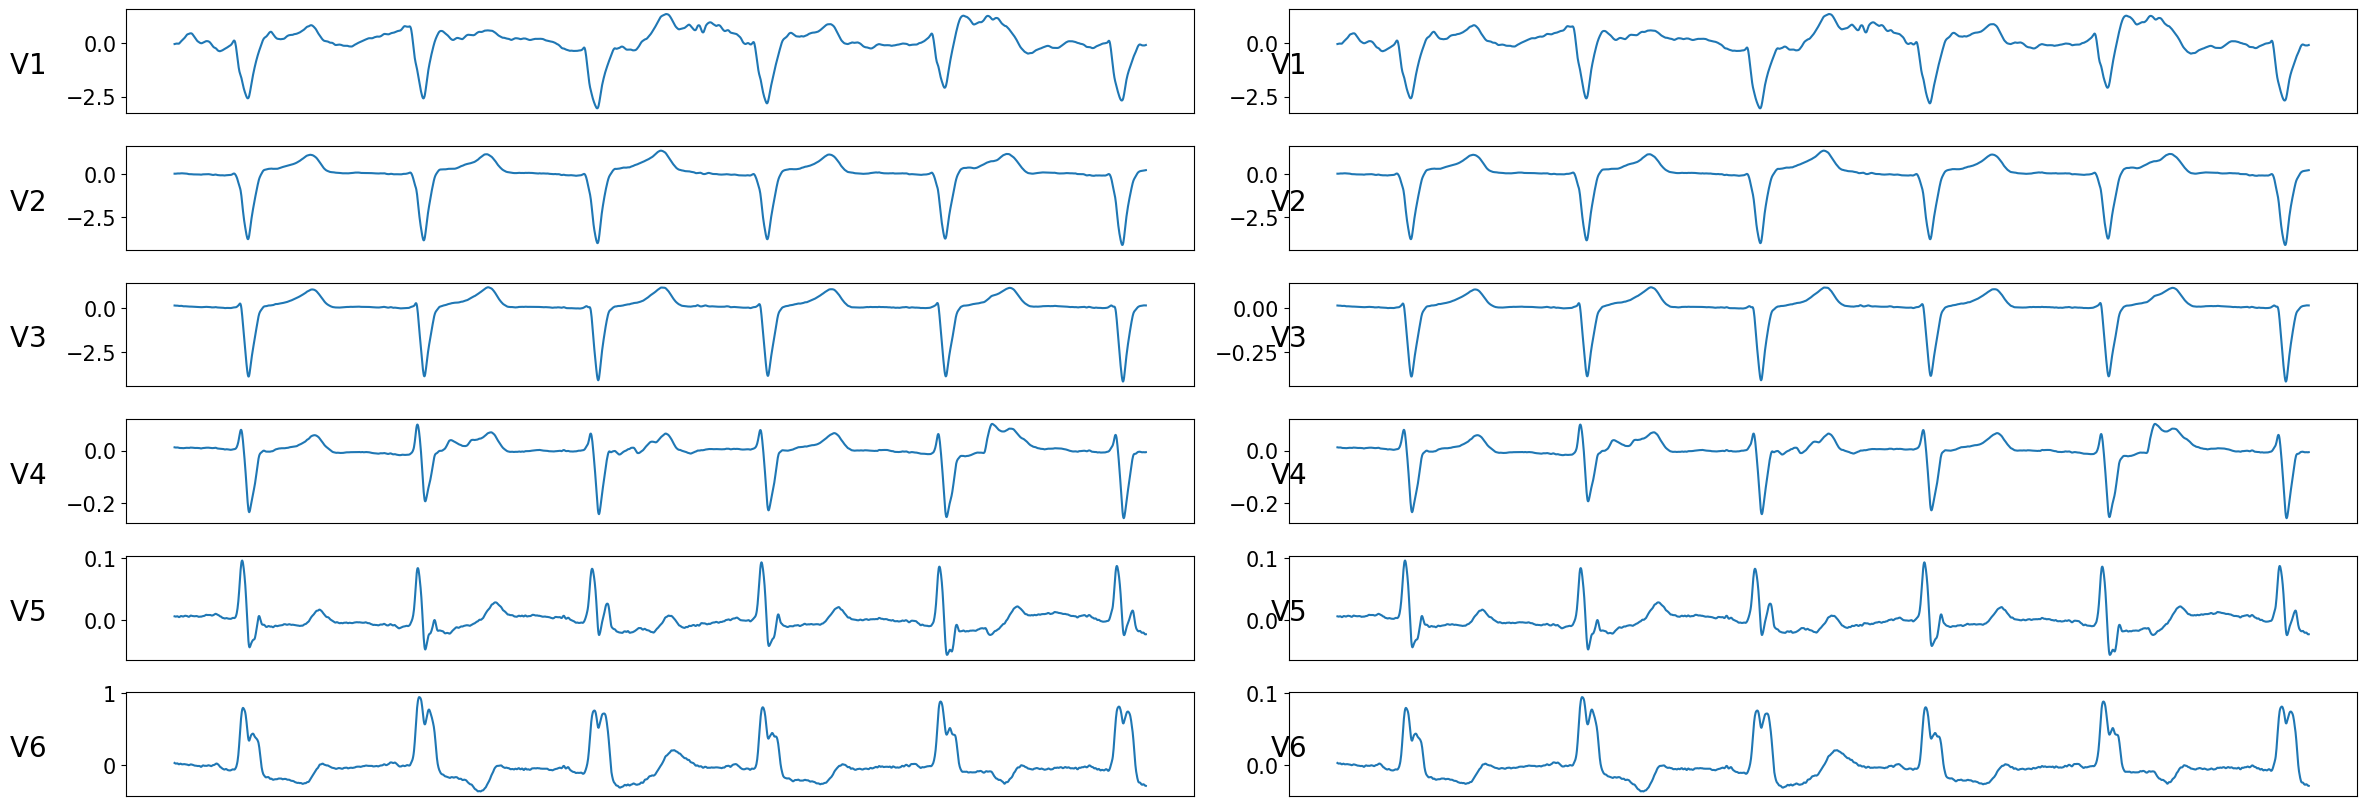

In [131]:
import matplotlib.pyplot as plt
# plt.rcParams.update({'font.size': 15})

fig, axs = plt.subplots(6, 2, figsize=(25, 10))
axs[0][0].plot(a[2][6][500:3000], 'tab:blue')
axs[0][0].set_title('V1                      ', fontsize = 20, x=0,y = 0.3)
axs[1][0].plot(a[2][7][500:3000], 'tab:blue')
axs[1][0].set_title('V2                      ', fontsize = 20, x=0,y = 0.3)
axs[2][0].plot(a[2][8][500:3000], 'tab:blue')
axs[2][0].set_title('V3                      ', fontsize = 20, x=0,y = 0.3)
axs[3][0].plot(a[2][9][500:3000]/10, 'tab:blue')
axs[3][0].set_title('V4                      ', fontsize = 20, x=0,y = 0.3)
axs[4][0].plot(a[2][10][500:3000]/10, 'tab:blue')
axs[4][0].set_title('V5                      ', fontsize = 20, x=0,y = 0.3)
axs[5][0].plot(a[2][11][500:3000], 'tab:blue')
axs[5][0].set_title('V6                      ', fontsize = 20, x=0,y = 0.3)
axs[0][1].plot(a[2][6][500:3000], 'tab:blue')
axs[0][1].set_title('V1', fontsize = 20, x=0,y = 0.3)
axs[1][1].plot(a[2][7][500:3000], 'tab:blue')
axs[1][1].set_title('V2', fontsize = 20, x=0,y = 0.3)
axs[2][1].plot(a[2][8][500:3000]/10, 'tab:blue')
axs[2][1].set_title('V3', fontsize = 20, x=0,y = 0.3)
axs[3][1].plot(a[2][9][500:3000]/10, 'tab:blue')
axs[3][1].set_title('V4', fontsize = 20, x=0,y = 0.3)
axs[4][1].plot(a[2][10][500:3000]/10, 'tab:blue')
axs[4][1].set_title('V5', fontsize = 20, x=0,y = 0.3)
axs[5][1].plot(a[2][11][500:3000]/10, 'tab:blue')
axs[5][1].set_title('V6', fontsize = 20, x=0,y = 0.3)
axs[0][0].axes.get_xaxis().set_ticks([])
axs[1][0].axes.get_xaxis().set_ticks([])
axs[2][0].axes.get_xaxis().set_ticks([])
axs[3][0].axes.get_xaxis().set_ticks([])
axs[4][0].axes.get_xaxis().set_ticks([])
axs[5][0].axes.get_xaxis().set_ticks([])
axs[0][1].axes.get_xaxis().set_ticks([])
axs[1][1].axes.get_xaxis().set_ticks([])
axs[2][1].axes.get_xaxis().set_ticks([])
axs[3][1].axes.get_xaxis().set_ticks([])
axs[4][1].axes.get_xaxis().set_ticks([])
axs[5][1].axes.get_xaxis().set_ticks([])
# plt.xticks(np.arange(-5, 5, step=2))
plt.tight_layout(pad = 5, h_pad = 1, w_pad = 1)
bbox_inches='tight'
plt.savefig("/media/mountHDD2/thao/git/HeartResearch/Data Exploration/ECGsig.pdf", format = 'pdf', dpi = 300)